In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("california_housing_train.csv")

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [21]:
import numpy as np
bedrooms_np=np.array(data[:]['total_bedrooms'])
population=np.array(data[:]['population'])
print(bedrooms.shape)
print(population.shape)

(17000,)
(17000,)


Text(0, 0.5, 'Total Bedrooms')

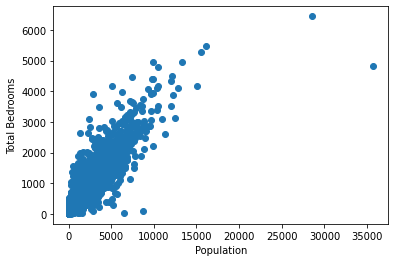

In [13]:
import matplotlib.pyplot as plt
pop=data['population']
bedrooms=data['total_bedrooms']
plt.scatter(pop,bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(population.reshape(17000,1),bedrooms_np)

LinearRegression()

In [23]:
bedroom_predict=model.predict(population.reshape(-1,1))

In [24]:
bedroom_predict

array([405.26666788, 442.15377589, 184.59116211, ..., 479.36445501,
       496.83729565, 337.64030321])

Text(0, 0.5, 'Total Bedrooms')

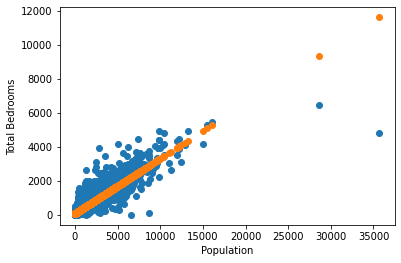

In [25]:
pop=data['population']
bedrooms=data['total_bedrooms']
plt.scatter(pop,bedrooms)
plt.scatter(pop,bedroom_predict)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [28]:
prediction_df= pd.DataFrame({"Population":pop,
'Bedrooms':bedrooms,
'Skelearn Bedrooms prediction':bedroom_predict})

In [29]:
prediction_df

,Population,Bedrooms,Skelearn Bedrooms prediction
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359
...,...,...,...
16995,907.0,394.0,370.320987
16996,1194.0,528.0,463.185899
16997,1244.0,531.0,479.364455
16998,1298.0,552.0,496.837296


In [32]:
#Công thức gán nhãn
# y[i]= alpha +(beta*x[i])+ error
# y_hat[i]=alpha_hat +(beta_hat*x[i])
def get_prediction(model,x):
    alpha_hat=model['alpha_hat']
    beta_hat=model['beta_hat']

    return alpha_hat + beta_hat *x


In [38]:
test_model ={'alpha_hat':1,'beta_hat':1/2}
test_x= np.array([1,4,3])
get_prediction(test_model,test_x)

array([1.5, 3. , 2.5])

Text(0, 0.5, 'Total Bedrooms')

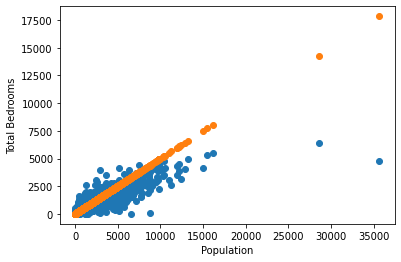

In [39]:
pop=data['population']
bedrooms=data['total_bedrooms']
plt.scatter(pop,bedrooms)
plt.scatter(pop,get_prediction(test_model,population))
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [43]:
def mean_squared_error(y,y_predictions):
    n= len(y)
    return np.sum(np.square(y-y_predictions))/n
    #n là số chiều của y
def mean_absolute_error(y,y_predictions):
    n=len(y)


    return np.sum(np.abs(y-y_predictions)) /n

In [44]:

mse1 = mean_squared_error(get_prediction(test_model,population),bedrooms_np)
mse1

111830.7436617647

In [45]:
mae = mean_absolute_error(get_prediction(test_model,population),bedrooms_np)

In [46]:
mae

213.45373529411765

In [47]:
def get_best_model(x,y):
    x_bar= np.average(x)
    y_bar=np.average(y)
    top = np.sum((x-x_bar)*(y-y_bar))
    bot = np.sum((x-x_bar)**2)
    beta_hat=top /bot
    alpha_hat = y_bar -beta_hat*x_bar
    model ={'alpha_hat':alpha_hat,'beta_hat':beta_hat}
    return model

In [48]:
best_model = get_best_model(population,bedrooms_np)

In [49]:
best_model

{'alpha_hat': 76.84197820308827, 'beta_hat': 0.32357112283793565}

Text(0, 0.5, 'Total Bedrooms')

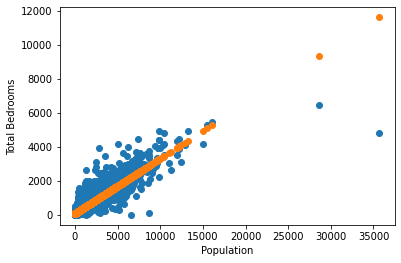

In [50]:
pop=data['population']
bedrooms=data['total_bedrooms']
plt.scatter(pop,bedrooms)
plt.scatter(pop,get_prediction(best_model,population))
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

In [51]:
prediction_df['Our Model Prediction'] =get_prediction(best_model,population)
prediction_df

,Population,Bedrooms,Skelearn Bedrooms prediction,Our Model Prediction
0,1015.0,1283.0,405.266668,405.266668
1,1129.0,1901.0,442.153776,442.153776
2,333.0,174.0,184.591162,184.591162
3,515.0,337.0,243.481106,243.481106
4,624.0,326.0,278.750359,278.750359
...,...,...,...,...
16995,907.0,394.0,370.320987,370.320987
16996,1194.0,528.0,463.185899,463.185899
16997,1244.0,531.0,479.364455,479.364455
16998,1298.0,552.0,496.837296,496.837296
